# Introdução a Ciência de Dados

## Conhecendo as bibliotecas

### Pandas 🐼
Biblioteca fundamental para manipulação e análise de dados tabulares. Permite leitura de arquivos, limpeza, seleção, filtragem, agregação e combinação de dados de forma eficiente. É a base operacional do trabalho analítico.

### Matplotlib 📊
Ferramenta principal para criação de visualizações em Python. Oferece controle detalhado sobre gráficos, permitindo construir desde plots simples até diagramas altamente customizados.

### Seaborn 🌊
Camada de alto nível construída sobre o Matplotlib, focada em visualizações estatísticas com estética aprimorada. Facilita a criação de gráficos complexos com menos código, mantendo consistência visual.

In [27]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mudando o tema dos gráficos
sns.set_theme(style="whitegrid")

Antes de iniciar com dados reais, vamos aprender alguns conceitos básicos!

1. Criando uma tabela do zero (Dataframe)

In [28]:
dados_lab = {
    'Tipo': ['Lítio-Íon', 'Chumbo-Ácido', 'Estado Sólido', 'Níquel-Cádmio'],
    'Densidade_wh_kg': [250, 40, 400, 60],
    'Ciclos_Vida': [2000, 500, 5000, 1000],
    'Seguro': [True, True, True, False]
}

df_lab = pd.DataFrame(dados_lab)
df_lab

,Tipo,Densidade_wh_kg,Ciclos_Vida,Seguro
0,Lítio-Íon,250,2000,True
1,Chumbo-Ácido,40,500,True
2,Estado Sólido,400,5000,True
3,Níquel-Cádmio,60,1000,False


In [29]:
df_lab.shape

(4, 4)

In [30]:
df_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tipo             4 non-null      object
 1   Densidade_wh_kg  4 non-null      int64 
 2   Ciclos_Vida      4 non-null      int64 
 3   Seguro           4 non-null      bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 232.0+ bytes


2. Cálculando as métricas estatísticas

In [31]:
df_lab.describe()

,Densidade_wh_kg,Ciclos_Vida
count,4.00000,4.000000
mean,187.50000,2125.000000
std,170.36725,2015.564437
min,40.00000,500.000000
25%,55.00000,875.000000
50%,155.00000,1500.000000
75%,287.50000,2750.000000
max,400.00000,5000.000000


3. Ordenando valores

In [32]:
df_lab.sort_values(by='Densidade_wh_kg', ascending=False)

,Tipo,Densidade_wh_kg,Ciclos_Vida,Seguro
2,Estado Sólido,400,5000,True
0,Lítio-Íon,250,2000,True
3,Níquel-Cádmio,60,1000,False
1,Chumbo-Ácido,40,500,True


4. Filtragem

In [33]:
filtro = df_lab['Ciclos_Vida'] > 1500
df_lab[filtro]

,Tipo,Densidade_wh_kg,Ciclos_Vida,Seguro
0,Lítio-Íon,250,2000,True
2,Estado Sólido,400,5000,True


## Carregando os dados

Com o Pandas, podemos carregar diversos tipos de arquivos, como CSV, Excel, JSON, TXT, entre outros. Veja no exemplo abaixo como carregar um arquivo CSV:

```python
df = pd.read_csv("caminho/arquivo.csv")
```
É possível também usar alguns parâmetros para tratamentos iniciais nos dados:
```python
df = pd.read_csv(
    "arquivo.csv", # caminho do arquivo
    sep=";", # separador, o padrão é ","
    encoding="utf-8", # codificação (como "utf-8" ou "latin1")
    usecols=["data", "valor"], # seleciona apenas colunas específicas
    parse_dates=["data"], # converte colunas para datetime
)
```

Neste curso, vamos carregar um arquivo CSV salvo diretamente no Github.

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/andrevff/jd2025/refs/heads/main/electric-vehicles.csv")
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


### Dicionário de dados
1. **Brand**: A Marca (o fabricante). Ex: Tesla, BMW.
2. **Model**: O Modelo específico. Ex: Model 3, iX3.
3. **AccelSec**: Aceleração 0-100 km/h em segundos.
4. **TopSpeed_KmH**: Velocidade Máxima.
5. **Range_Km**: Autonomia. Quantos km roda com a bateria totalmente carregada.
6. **Efficiency_WhKm**: Consumo energético em Watt-hora por km. Quanto MENOR, mais eficiente. É o "litros por km" do elétrico.
7. **FastCharge_KmH**: Velocidade de recarga. Quantos km de autonomia você ganha por hora plugado num carregador rápido.
8. **RapidCharge**: Se aceita carga rápida DC (Sim/Não).
9. **PowerTrain**: Tração.
  - **AWD**: All Wheel Drive (4x4) - Geralmente dois motores.
  - **RWD**: Rear Wheel Drive (Tração Traseira).
  - **FWD**: Front Wheel Drive (Tração Dianteira).
10. **PlugType**: Tipo do conector (ex: CCS, CHAdeMO).
11. **BodyStyle**: Tipo de carroceria (Sedan, SUV, Hatchback).
12. **Segment**: Categoria de mercado (A = Subcompacto, B = Compacto... F = Luxo, N = Comercial/Van).
13. **Seats**: Quantidade de assentos.
14. **PriceEuro**: Preço na Alemanha (base do dataset) em Euros.

## Limpeza e preparação inicial

In [35]:
# Vamos limpar o dataframe, selecionando apenas as colunas de nosso interesse.
colunas = ['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'PowerTrain', 'PriceEuro']
df = df[colunas]
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PowerTrain,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,AWD,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,RWD,30000
2,Polestar,2,4.7,210,400,181,AWD,56440
3,BMW,iX3,6.8,180,360,206,RWD,68040
4,Honda,e,9.5,145,170,168,RWD,32997


## Análise Exploratória

In [36]:
# Pergunta 1: Qual é o carro com maior aceleração?
print('Top 5: Mais rápidos (0-100 km/h)')

rapidos = df.sort_values('AccelSec', ascending=True).head()
rapidos

Top 5: Mais rápidos (0-100 km/h)


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PowerTrain,PriceEuro
51,Tesla,Roadster,2.1,410,970,206,AWD,215000
59,Tesla,Model S Performance,2.5,261,505,188,AWD,96990
5,Lucid,Air,2.8,250,610,180,AWD,105000
16,Porsche,Taycan Turbo S,2.8,260,375,223,AWD,180781
81,Tesla,Model X Performance,2.8,250,440,216,AWD,102990


In [37]:
# Pergunta 2: Quem é mais eficiente?

print('Top 5: Mais eficientes (menor consumo de energia)')
eficientes = df.sort_values('Efficiency_WhKm', ascending=True).head()
eficientes

Top 5: Mais eficientes (menor consumo de energia)


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PowerTrain,PriceEuro
48,Lightyear,One,10.0,150,575,104,AWD,149000
14,Hyundai,IONIQ Electric,9.7,165,250,153,FWD,34459
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,RWD,46380
41,Hyundai,Kona Electric 39 kWh,9.9,155,255,154,FWD,33971
19,Mini,Cooper SE,7.3,150,185,156,FWD,31681


In [38]:
# Pergunta 3: Qual carro com pior custo-beneficio?

df['Custo_por_Eficiencia'] = df['PriceEuro'] / df['Efficiency_WhKm']

print('Carros com o pior custo-benefício')
df.sort_values('Custo_por_Eficiencia', ascending=False).head()

Carros com o pior custo-benefício


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PowerTrain,PriceEuro,Custo_por_Eficiencia
48,Lightyear,One,10.0,150,575,104,AWD,149000,1432.692308
51,Tesla,Roadster,2.1,410,970,206,AWD,215000,1043.689320
16,Porsche,Taycan Turbo S,2.8,260,375,223,AWD,180781,810.677130
72,Porsche,Taycan Cross Turismo,3.5,250,385,217,AWD,150000,691.244240
79,Porsche,Taycan Turbo,3.2,260,390,215,AWD,148301,689.772093


In [39]:
# Perguta 4: Quantos modelos custam menos de 100.000 Euros?

df[df['PriceEuro'] < 100000].shape[0]

93

In [40]:
menos_de_100k = df[df['PriceEuro'] < 100000]
menos_de_100k.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PowerTrain,PriceEuro,Custo_por_Eficiencia
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,AWD,55480,344.596273
1,Volkswagen,ID.3 Pure,10.0,160,270,167,RWD,30000,179.640719
2,Polestar,2,4.7,210,400,181,AWD,56440,311.823204
3,BMW,iX3,6.8,180,360,206,RWD,68040,330.291262
4,Honda,e,9.5,145,170,168,RWD,32997,196.410714


In [41]:
# Pergunta 5: Quantos modelos com PowerTrain AWD custam menos de 100.000 Euros

df[(df['PriceEuro'] < 100000) & (df['PowerTrain'] == 'AWD')].shape[0]

31

In [42]:
menos_de_100k_awd = df[(df['PriceEuro'] < 100000) & (df['PowerTrain'] == 'AWD')]
menos_de_100k_awd.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PowerTrain,PriceEuro,Custo_por_Eficiencia
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,AWD,55480,344.596273
2,Polestar,2,4.7,210,400,181,AWD,56440,311.823204
9,Audi,Q4 e-tron,6.3,180,400,193,AWD,55000,284.974093
10,Mercedes,EQC 400 4MATIC,5.1,180,370,216,AWD,69484,321.685185
21,Tesla,Model Y Long Range Dual Motor,5.1,217,425,171,AWD,58620,342.807018


## Visualização de Dados

In [43]:
# Autonomia X Marca

order = df.groupby('Brand')['Range_Km'].mean().sort_values(ascending=False)
order.head()


,Range_Km
Brand,
Lucid,610.000000
Lightyear,575.000000
Tesla,500.769231
CUPRA,425.000000
Polestar,400.000000


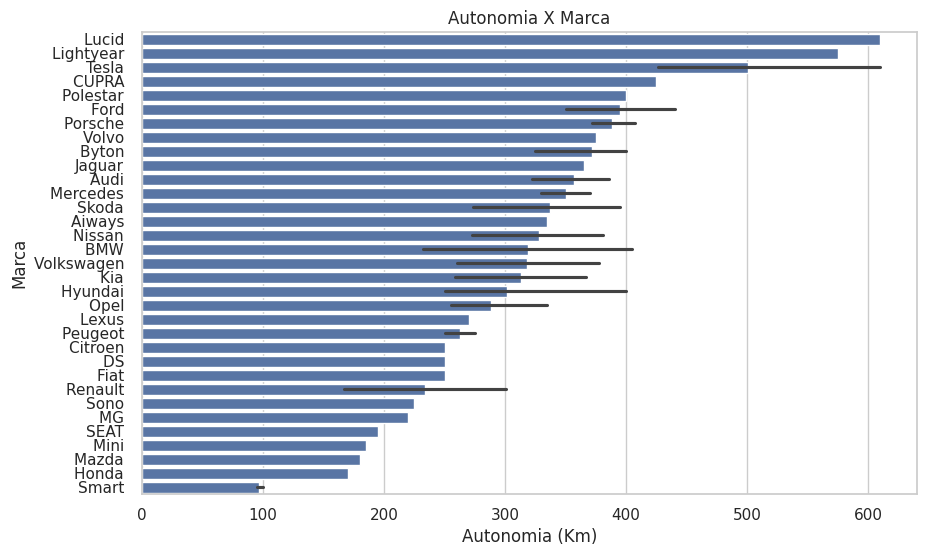

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='Range_Km',
    y='Brand',
    order=order.index,
    orient='h',
)

plt.title('Autonomia X Marca')
plt.xlabel('Autonomia (Km)')
plt.ylabel('Marca')
plt.show()

O Cenário: Ranking de autonomia (Range) ordenado por marca.

- Análise Técnica (O que os dados dizem): Observamos uma clara estratificação tecnológica. Marcas nativamente elétricas como Lucid, Tesla e Polestar dominam o quartil superior. Isso sugere que plataformas desenvolvidas exclusivamente para elétricos permitem maior densidade energética volumétrica (baterias maiores em mesmo espaço) do que plataformas adaptadas (comuns em marcas tradicionais no meio da tabela).

- Interpretação para a Classe: Observe as linhas pretas finas sobre as barras (os intervalos de confiança/erro). A barra da Tesla é longa, indicando um alto desvio padrão. Isso significa que a Tesla possui um portfólio heterogêneo: oferece desde carros de entrada com autonomia moderada até modelos de longuíssima duração. Já a Lucid, sem essa linha, mostra consistência (ou pouca variedade) em seus modelos de alta performance."

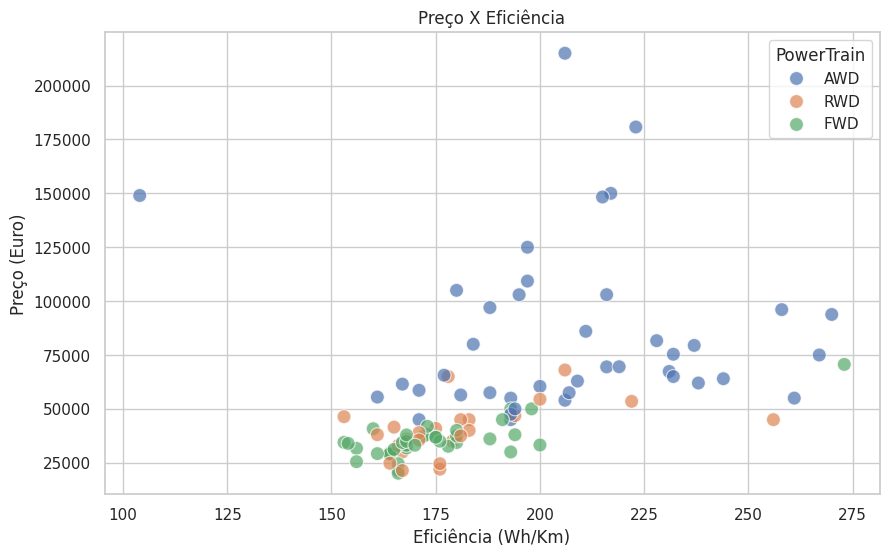

In [45]:
# Preço X Eficiência

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Efficiency_WhKm',
    y='PriceEuro',
    hue='PowerTrain', # Cores diferentes para tipos de tração
    s=100,            # Tamanho dos pontos
    alpha=0.7         # Transparencia
)

plt.title('Preço X Eficiência')
plt.xlabel('Eficiência (Wh/Km)')
plt.ylabel('Preço (Euro)')
plt.show()

O Cenário: Dispersão cruzando consumo ($Wh/km$) com custo (€).
- Análise Técnica (O que os dados dizem):Identificamos clusters (agrupamentos) baseados na mecânica.
  1. Cluster AWD (Azul): Posicionado no quadrante superior direito. Alta ineficiência (>200 Wh/km) correlacionada a preços altos. A complexidade mecânica (dois motores) e o peso adicional penalizam o consumo específico.
  2. Cluster FWD (Verde): Posicionado no quadrante inferior esquerdo. Alta eficiência (<160 Wh/km) e preços acessíveis.
  
- Interpretação para a Classe: Aqui vemos o trade-off da termodinâmica. Potência custa energia. Os pontos azuis (AWD) são carros de alta performance, mas pagam um 'imposto físico' por isso: gastam mais energia para mover cada quilograma.

/tmp/ipython-input-1938045666.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Aceleração (s)')

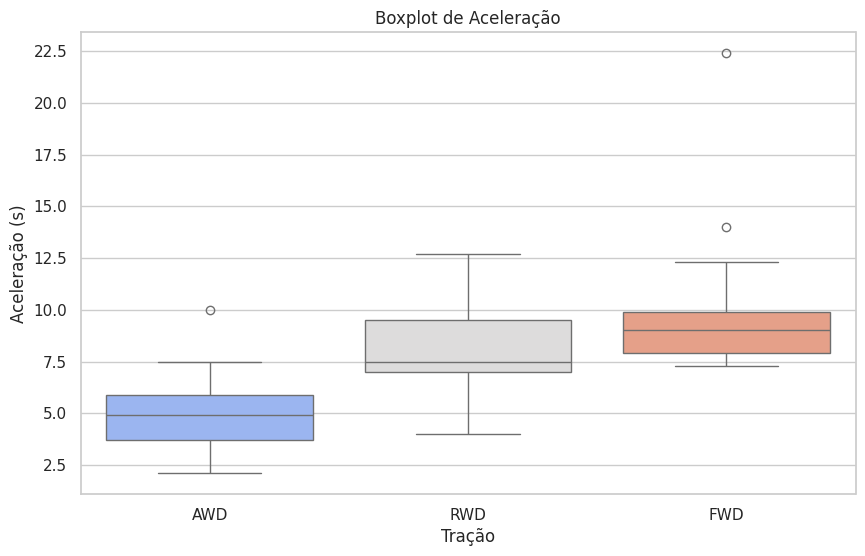

In [46]:
# Boxplot de Aceleração

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='PowerTrain',
    y='AccelSec',
    palette='coolwarm'
)

plt.title('Boxplot de Aceleração')
plt.xlabel('Tração')
plt.ylabel('Aceleração (s)')

O Cenário: Comparativo estatístico de performance (0-100 km/h).

- Análise Técnica (O que os dados dizem): O Boxplot revela a influência do coeficiente de atrito e transferência de carga.

- AWD: A mediana é significativamente menor (mais rápida) e a dispersão (tamanho da caixa) é baixa. A tração integral maximiza a aderência na arrancada.

- FWD: A mediana é alta (lenta) com alta dispersão. Veículos de tração dianteira sofrem com o alívio de peso no eixo dianteiro durante a aceleração, limitando fisicamente a capacidade de tracionar sem destracionar (patinar).

- Interpretação para a Classe: O gráfico prova que física vence motor. Não adianta ter muita potência se você não consegue transferi-la para o chão. O AWD é consistente (caixa estreita), enquanto o FWD é limitado pela física da transferência de peso, independentemente da potência do motor.

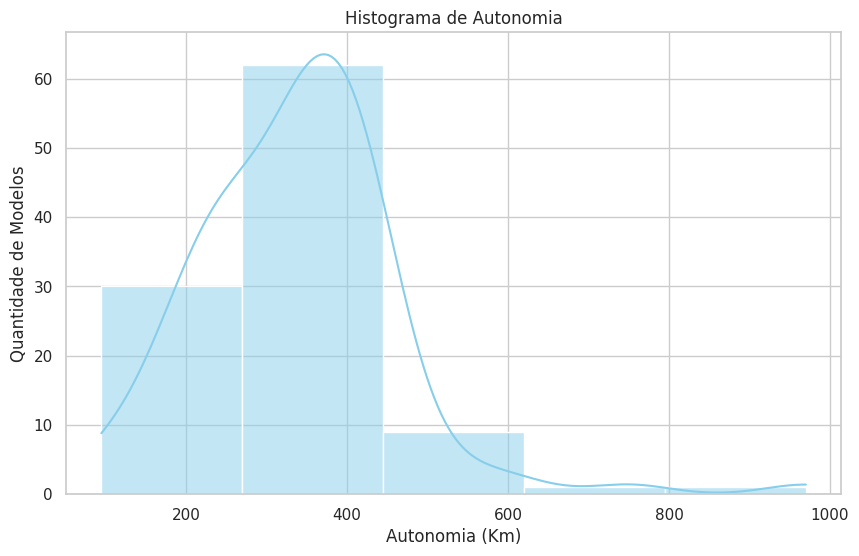

In [47]:
# Histograma de carga rápida

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='Range_Km',
    bins=5,
    kde=True,
    color='skyblue'
)

plt.title('Histograma de Autonomia')
plt.xlabel('Autonomia (Km)')
plt.ylabel('Quantidade de Modelos')
plt.show()

O Cenário: A curva de distribuição dos modelos disponíveis no mercado.

- Análise Técnica (O que os dados dizem): A distribuição não é normal (Gaussiana) perfeita; ela apresenta uma assimetria à direita (Right-skewed). A moda e a mediana concentram-se no intervalo de 300km a 450km. Isso indica uma convergência de mercado: este é o "ponto ótimo" (Sweet Spot) entre custo de produção da bateria (kWh) e utilidade percebida pelo consumidor.

- Interpretação para a Classe: Por que a maioria dos carros está acumulada no meio? Porque acima de 500km, o custo marginal da autonomia dispara. Para adicionar mais 100km, você precisa adicionar muito peso em baterias, o que reduz a eficiência. O mercado decidiu que ~400km é o 'padrão ouro' atual para equilibrar preço e usabilidade.

In [48]:
# Heatmap de correlação
import numpy as np

colunas_numericas = df.select_dtypes(include=[np.number])
correlacao = colunas_numericas.corr()
correlacao

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PriceEuro,Custo_por_Eficiencia
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.627174,-0.484621
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.829057,0.676072
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.674844,0.632200
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.396705,0.068243
PriceEuro,-0.627174,0.829057,0.674844,0.396705,1.000000,0.907831
Custo_por_Eficiencia,-0.484621,0.676072,0.632200,0.068243,0.907831,1.000000


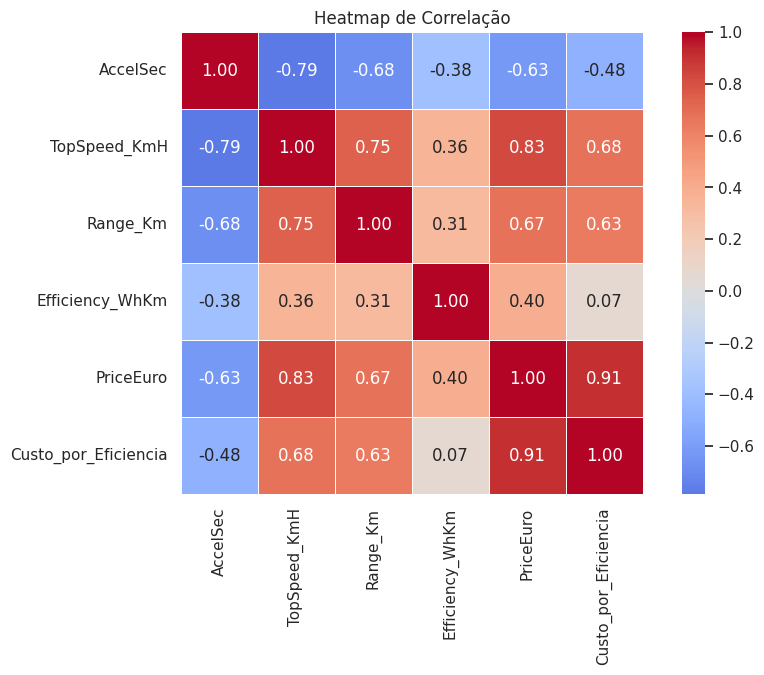

In [49]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    correlacao,
    annot=True,        # annot=True escreve os números dentro dos quadradinhos
    fmt=".2f",         # Formatação: 2 casas decimais (ex: 0.95)
    cmap="coolwarm",   # Paleta de cores: Vermelho (Quente) vs Azul (Frio)
    center=0,          # Define que o Zero é a cor branca (neutra)
    square=True,       # Deixa os quadradinhos perfeitos
    linewidths=0.5     # Linhas brancas separando os quadrados
)

plt.title('Heatmap de Correlação')
plt.show()

O Cenário: A força linear entre as variáveis numéricas (-1 a 1).

- Análise Técnica (O que os dados dizem):

  1. TopSpeed vs Price (+0.83): Forte correlação positiva. Velocidade é a variável mais atrelada ao custo de engenharia (aerodinâmica, gerenciamento térmico, motores).

  2. Efficiency vs Price (+0.40): Correlação moderada/fraca. Este é um insight crucial: Pagar mais caro não garante necessariamente um carro mais eficiente energeticamente. Muitas vezes, paga-se por luxo ou tamanho, sacrificando a eficiência.

- Interpretação para a Classe: Os números não mentem. O quadrado vermelho escuro (0.83) nos diz que velocidade é um item de luxo. Mas o quadrado claro (0.40) na eficiência é um alerta: um carro de 100 mil euros pode ser menos 'verde' e gastar mais energia que um de 30 mil. Eficiência é uma escolha de engenharia, não apenas uma consequência do preço.

---

## BÔNUS: Capacidade da Bateria

O dataset não diz a capacidade da bateria em kWh. Mas...

$$ Energia Total = Eficiência \times Distância $$

Vamos estimar a capacidade da bateria de cada carro.

In [50]:
from plotly import express as px

# Convertendo Wh para kWh (dividindo por 1000)
df['Capacidade_Estimada_kWh'] = (df['Efficiency_WhKm'] * df['Range_Km']) / 1000

# Gráfico Interativo (Plotly)
# PASSE O MOUSE SOBRE AS BOLINHAS!
fig = px.scatter(
    df,
    x='Capacidade_Estimada_kWh',
    y='PriceEuro',
    color='Brand',
    hover_name='Model', # Mostra o nome do carro ao passar o mouse
    size='Range_Km',
    title='Raio-X: Capacidade da Bateria vs Preço (Interativo)'
)
fig.show()

O Cenário: Cruzamento entre o custo do veículo (Eixo Y) e a capacidade estimada da bateria em kWh (Eixo X). O tamanho das bolinhas representa a Autonomia.

- Análise Técnica (O que os dados dizem):

  1. Correlação Positiva Forte: Existe uma linha de tendência clara subindo da esquerda para a direita. Isso confirma a hipótese de que a Bateria é o componente mais caro do veículo. A cada kWh adicionado, o preço base do carro sobe proporcionalmente.

  2. O "Super-Outlier" (Tesla Roadster): Observe a bolinha isolada no extremo direito (cor azul/roxa da Tesla). Ela tem uma bateria estimada gigantesca (perto de 200 kWh) e um preço astronômico (>200k €). Isso distorce a escala e mostra um veículo de nicho (Hypercar) comparado aos carros de consumo de massa.

  3. Densidade de Mercado: A grande concentração de bolinhas coloridas entre 40 kWh e 80 kWh (no eixo X) e entre 30k e 60k Euros (no eixo Y) revela o padrão da indústria. É ali que a Volkswagen, Hyundai, Kia e Peugeot estão brigando pelo consumidor médio.